In [1]:
#Ian Colvin 219655827
#Minquan Li 219726989
#James Tath 216766291
#CSC 180 – 02 / Final Project / Due 11.25.2019


In [2]:
import time
import sklearn
import collections
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

pd.set_option('display.max_rows', 200)

data = pd.read_csv('autofatality.csv')

In [3]:
data

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,P_AGE,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,C_SEV,V_TYPE,P_SEX,P_PSN,P_ISEV,P_SAFE,P_USER
0,2013.0,7.0,3.0,15.000000,1.0,26.00000,6,3,1,1,1,18,2,14,M,12,2,9,5
1,2009.0,10.0,5.0,13.000000,2.0,41.00000,36,2,1,1,1,3,2,1,M,11,2,2,1
2,2012.0,7.0,5.0,22.000000,1.0,40.00000,2,1,1,1,-1,18,1,1,M,11,3,1,1
3,2000.0,7.0,7.0,15.000000,2.0,18.00000,-1,7,1,1,1,18,1,1,F,21,3,2,2
4,2008.0,6.0,3.0,16.000000,2.0,41.00000,6,1,1,1,1,18,2,1,M,11,2,2,1
5,2003.0,9.0,3.0,8.000000,2.0,27.00000,21,1,1,1,1,1,2,1,M,11,2,2,1
6,2002.0,10.0,6.0,14.000000,2.0,36.00000,21,1,1,1,1,18,2,1,M,13,1,2,2
7,2012.0,3.0,5.0,12.000000,2.0,42.00000,21,2,1,4,1,4,2,1,M,11,2,2,1
8,2003.0,9.0,2.0,8.000000,2.0,41.00000,21,1,1,1,1,18,2,1,M,11,2,2,1
9,2003.0,8.0,3.0,11.000000,3.0,35.00000,21,1,1,1,1,18,2,1,F,23,2,2,2


In [4]:
# =============== functions ===============
def convertToInt(x):
    if x == 1:
        return x
    else:
        return int(0)
        

            

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()
    if sd is None:
        sd = df[name].std()
    df[name] = (df[name] - mean) / sd
    
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

def normalize_data(x):
    for col in x.columns:
        two_class = (encode_text_index(x,col).size == 2)
        max_num = x[col].max()
        min_num = x[col].min()
        if (max_num == 1 and min_num == 0 and two_class):
            continue
        elif (encode_text_index(x,col).size == 1):
            continue
        else:
            encode_numeric_zscore(x,col)

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)


def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print("Intercept: {}".format(intercept))
    zeroCoef = r[ r['coef'] == 0.0].index
    r.drop(zeroCoef, inplace=True)
    r['coef'].plot(figsize=(10,10), kind='barh', color=r['positive'].map({True: 'b', False: 'r'}))

In [5]:
#One hot encoding categorical features

data.drop(columns='P_ISEV', inplace=True)
encode_text_dummy(data, 'P_SEX')
encode_text_dummy(data, 'C_CONF')
encode_text_dummy(data, 'C_RCFG')
encode_text_dummy(data, 'C_WTHR')
encode_text_dummy(data, 'C_RSUR')
encode_text_dummy(data, 'C_RALN')
encode_text_dummy(data, 'C_TRAF')
encode_text_dummy(data, 'V_TYPE')
encode_text_dummy(data, 'P_PSN')

encode_text_dummy(data, 'P_SAFE')
encode_text_dummy(data, 'P_USER')



In [6]:
#Normalizing the data
normalize_data(data)

# Data after One Hot Encoding

In [7]:
data

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,P_AGE,C_SEV,P_SEX--1,P_SEX-F,P_SEX-M,...,P_SAFE-9,P_SAFE-10,P_SAFE-12,P_SAFE-13,P_USER--1,P_USER-1,P_USER-2,P_USER-3,P_USER-4,P_USER-5
0,1.551881,0.179141,-0.658893,0.322132,-0.666190,-0.592569,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0.671161,0.961483,0.594029,-0.012892,-0.143225,0.234255,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1.331701,0.179141,0.594029,1.494717,-0.666190,0.182579,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,-1.310459,0.179141,1.429310,0.322132,-0.143225,-1.005981,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.450981,-0.342421,-0.658893,0.489644,-0.143225,0.234255,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,-0.649919,0.700702,-0.658893,-1.017965,-0.143225,-0.540892,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,-0.870099,0.961483,1.011669,0.154620,-0.143225,-0.075804,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,1.331701,-1.124762,0.594029,-0.347916,-0.143225,0.285932,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8,-0.649919,0.700702,-1.076533,-1.017965,-0.143225,0.234255,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,-0.649919,0.439921,-0.658893,-0.515428,0.902704,-0.127480,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
y = data['C_SEV']
x,y = to_xy(data, 'C_SEV')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print('x: '+str(x.shape))
print('y: '+str(y.shape))
print('x_train: '+str(x_train.shape))
print('y_train: '+str(y_train.shape))

x: (298614, 127)
y: (298614, 2)
x_train: (223960, 127)
y_train: (223960, 2)


# Fully Connected Neural Network : relu/sgd

loop number 0
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 223960 samples, validate on 74654 samples
Epoch 1/10
223960/223960 - 14s - loss: 0.1269 - val_loss: 0.1106
Epoch 2/10
223960/223960 - 12s - loss: 0.1076 - val_loss: 0.1062
Epoch 3/10
223960/223960 - 12s - loss: 0.1047 - val_loss: 0.1051
Epoch 4/10
223960/223960 - 12s - loss: 0.1034 - val_loss: 0.1047
Epoch 5/10
223960/223960 - 13s - loss: 0.1026 - val_loss: 0.1031
Epoch 6/10
223960/223960 - 13s - loss: 0.1020 - val_loss: 0.1035
Epoch 7/10
223960/223960 - 12s - loss: 0.1016 - val_loss: 0.1021
Epoch 8/10
223960/223960 - 12s - loss: 0.1012 - val_loss: 0.1021
Epoch 9/10
223960/223960 - 12s - loss: 0.1009 - val_loss: 0.1017
Epoch 10/10
223960/223960 - 12s - loss: 0.1006 - val_loss: 0.1017
Training finished...Loading the best model

              precision    recall  f1-score   support

           0       0.86      0.69      0.77     24713
           1 

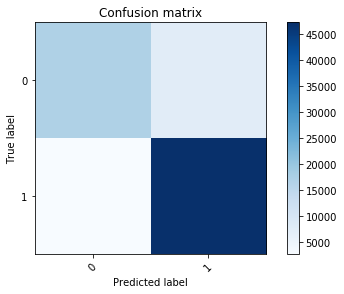

In [9]:
# save best model
checkpointer = ModelCheckpoint(filepath="best_fcnn_weights.hdf5", verbose=0, save_best_only=True)

# train 5 times
for i in range(1):
    print('loop number '+str(i))
    model = Sequential()
    model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(y.shape[1]))

    model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor, checkpointer],verbose=2,epochs=10)


print('Training finished...Loading the best model')  
print()
model.load_weights('best_fcnn_weights.hdf5') # load weights from best model

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true= np.argmax(y_test,axis=1) 
print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, encode_text_index(data, 'C_SEV'))
plt.show()

# Fully-Connected Neural Network:relu/adam


loop number 0
Train on 223960 samples, validate on 74654 samples
Epoch 1/10
223960/223960 - 14s - loss: 0.1054 - val_loss: 0.1019
Epoch 2/10
223960/223960 - 15s - loss: 0.1001 - val_loss: 0.1011
Epoch 3/10
223960/223960 - 16s - loss: 0.0984 - val_loss: 0.0992
Epoch 4/10
223960/223960 - 17s - loss: 0.0971 - val_loss: 0.0991
Epoch 5/10
223960/223960 - 15s - loss: 0.0962 - val_loss: 0.0982
Epoch 6/10
223960/223960 - 14s - loss: 0.0953 - val_loss: 0.0982
Epoch 7/10
223960/223960 - 14s - loss: 0.0944 - val_loss: 0.0981
Epoch 8/10
223960/223960 - 14s - loss: 0.0937 - val_loss: 0.0984
Epoch 9/10
223960/223960 - 13s - loss: 0.0930 - val_loss: 0.0981
Epoch 10/10
223960/223960 - 14s - loss: 0.0921 - val_loss: 0.0996
Epoch 00010: early stopping
Training finished...Loading the best model

              precision    recall  f1-score   support

           0       0.86      0.71      0.78     24713
           1       0.87      0.95      0.90     49941

    accuracy                           0.87     

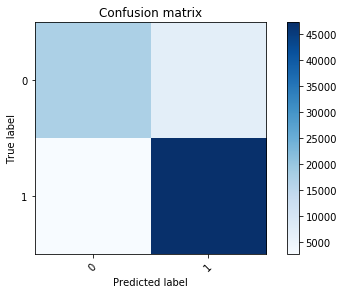

In [10]:
# save best model
checkpointer = ModelCheckpoint(filepath="best_fcnn_weights.hdf5", verbose=0, save_best_only=True)

# train 5 times
for i in range(1):
    print('loop number '+str(i))
    model = Sequential()
    model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(y.shape[1]))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor, checkpointer],verbose=2,epochs=10)


print('Training finished...Loading the best model')  
print()
model.load_weights('best_fcnn_weights.hdf5') # load weights from best model

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true= np.argmax(y_test,axis=1) 
print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, encode_text_index(data, 'C_SEV'))
plt.show()

## Fully-Connected Neural Network:sigmoid/adam


loop number 0
Train on 223960 samples, validate on 74654 samples
Epoch 1/10
223960/223960 - 14s - loss: 0.1084 - val_loss: 0.1039
Epoch 2/10
223960/223960 - 14s - loss: 0.1033 - val_loss: 0.1030
Epoch 3/10
223960/223960 - 14s - loss: 0.1024 - val_loss: 0.1024
Epoch 4/10
223960/223960 - 13s - loss: 0.1016 - val_loss: 0.1021
Epoch 5/10
223960/223960 - 13s - loss: 0.1010 - val_loss: 0.1014
Epoch 6/10
223960/223960 - 14s - loss: 0.1004 - val_loss: 0.1008
Epoch 7/10
223960/223960 - 14s - loss: 0.0997 - val_loss: 0.1006
Epoch 8/10
223960/223960 - 13s - loss: 0.0991 - val_loss: 0.1003
Epoch 9/10
223960/223960 - 14s - loss: 0.0987 - val_loss: 0.0996
Epoch 10/10
223960/223960 - 13s - loss: 0.0983 - val_loss: 0.0998
loop number 1
Train on 223960 samples, validate on 74654 samples
Epoch 1/10
223960/223960 - 16s - loss: 0.1084 - val_loss: 0.1065
Epoch 2/10
223960/223960 - 13s - loss: 0.1033 - val_loss: 0.1046
Epoch 3/10
223960/223960 - 16s - loss: 0.1025 - val_loss: 0.1028
Epoch 4/10
223960/223960

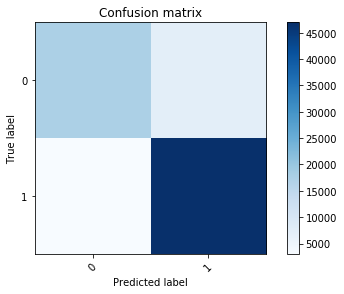

In [11]:
# save best model
checkpointer = ModelCheckpoint(filepath="best_fcnn_weights.hdf5", verbose=0, save_best_only=True)

# train 5 times
for i in range(2):
    print('loop number '+str(i))
    model = Sequential()
    model.add(Dense(100, input_dim=x_train.shape[1], activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(25, activation='sigmoid'))
    model.add(Dense(y.shape[1]))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor, checkpointer],verbose=2,epochs=10)


print('Training finished...Loading the best model')  
print()
model.load_weights('best_fcnn_weights.hdf5') # load weights from best model

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true= np.argmax(y_test,axis=1) 
print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, encode_text_index(data, 'C_SEV'))
plt.show()

# CNN

In [12]:
# Load modules
batch_size = 128
num_classes = 2
img_rows, img_cols = 1, x_train.shape[1]
x_train_cnn = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print('x_train shape:', x_train_cnn.shape)
print('x_test shape:', x_test_cnn.shape)
print("Training samples: {}".format(x_train_cnn.shape[0]))
print("Test samples: {}".format(x_test_cnn.shape[0]))

x_train shape: (223960, 1, 127, 1)
x_test shape: (74654, 1, 127, 1)
Training samples: 223960
Test samples: 74654


In [13]:
checkpointer = ModelCheckpoint(filepath="best_cnn_weights.hdf5", verbose=0, save_best_only=True)

model = Sequential()
input_shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 125, 32)        128       
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Conv2D(64, (1, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=None))
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 125, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 123, 64)        6208      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 61, 64)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 61, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3904)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               499840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

loop number 0
Train on 223960 samples, validate on 74654 samples
Epoch 1/5
223960/223960 - 55s - loss: 0.3468 - acc: 0.8515 - val_loss: 0.3298 - val_acc: 0.8585
Epoch 2/5
223960/223960 - 53s - loss: 0.3318 - acc: 0.8588 - val_loss: 0.3236 - val_acc: 0.8603
Epoch 3/5
223960/223960 - 53s - loss: 0.3280 - acc: 0.8601 - val_loss: 0.3226 - val_acc: 0.8617
Epoch 4/5
223960/223960 - 52s - loss: 0.3264 - acc: 0.8605 - val_loss: 0.3189 - val_acc: 0.8621
Epoch 5/5
223960/223960 - 53s - loss: 0.3249 - acc: 0.8609 - val_loss: 0.3187 - val_acc: 0.8621
Elapsed time: 0:04:26.52
              precision    recall  f1-score   support

           0       0.88      0.67      0.76     24713
           1       0.86      0.96      0.90     49941

    accuracy                           0.86     74654
   macro avg       0.87      0.81      0.83     74654
weighted avg       0.86      0.86      0.86     74654

[[16652  8061]
 [ 2237 47704]]


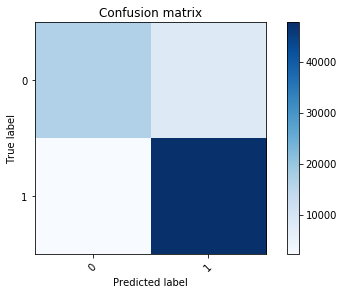

In [15]:
# show not only log loss but also accuracy for each epoch using metrics=['accuracy']
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])

# train 5 times
for i in range(1):
    print('loop number '+str(i))
    start_time = time.time()

    model.fit(x_train_cnn, y_train,     
              batch_size=batch_size,
              epochs=5,
              verbose=2,
              validation_data=(x_test_cnn, y_test),
              callbacks=[monitor,checkpointer])

    elapsed_time = time.time() - start_time
    print("Elapsed time: {}".format(hms_string(elapsed_time)))

model.load_weights('best_cnn_weights.hdf5')

pred = model.predict(x_test_cnn)
pred = np.argmax(pred,axis=1)
y_true= np.argmax(y_test,axis=1) 
print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, encode_text_index(data, 'C_SEV'))
plt.show()

# Lasso Regularization

,coef,positive
P_SAFE-2,-0.239033,False
C_CONF-21,-0.197029,False
C_CONF-36,-0.101409,False
C_RCFG-3,-0.082623,False
P_USER-5,-0.081706,False
C_TRAF-1,-0.077620,False
C_CONF-22,-0.068064,False
V_TYPE-1,-0.051957,False
P_USER-1,-0.050410,False
C_RCFG-2,-0.048011,False


Intercept: [0.6533991 0.3466009]


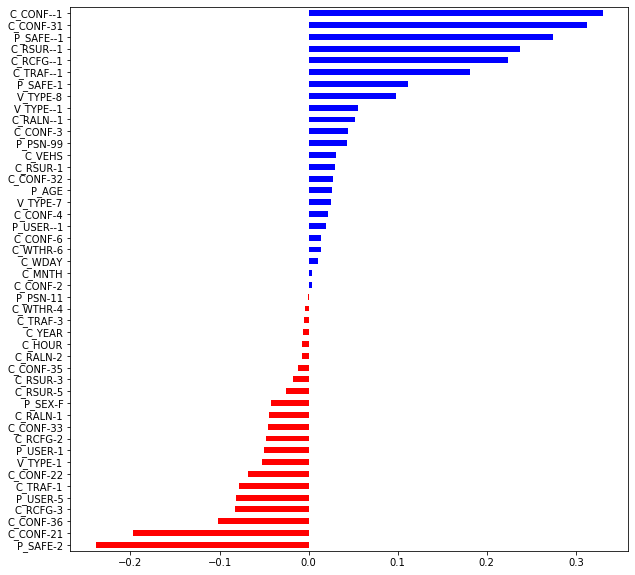

In [18]:
#import sklearn
from sklearn.linear_model import Lasso

# Create linear regression
regressor = Lasso(alpha=0.001)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred = regressor.predict(x_test)

names = list(data.columns.values)
names.remove('C_SEV')

report_coef(
 names,
 regressor.coef_[0],
 regressor.intercept_)

## Dropping after Regularization

In [19]:
r = pd.DataFrame( { 'coef': regressor.coef_[0], 'positive': regressor.coef_[0]>=0  }, index = names )
zeroCoef = r[ r['coef'] == 0.0].index
data.drop(columns=zeroCoef, inplace=True)

In [20]:
data.shape


(298614, 47)

In [22]:
pd.set_option('display.max_columns', 100)
data.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,P_AGE,C_SEV,P_SEX-F,C_CONF--1,C_CONF-2,C_CONF-3,C_CONF-4,C_CONF-6,C_CONF-21,C_CONF-22,C_CONF-31,C_CONF-32,C_CONF-33,C_CONF-35,C_CONF-36,C_RCFG--1,C_RCFG-2,C_RCFG-3,C_WTHR-4,C_WTHR-6,C_RSUR--1,C_RSUR-1,C_RSUR-3,C_RSUR-5,C_RALN--1,C_RALN-1,C_RALN-2,C_TRAF--1,C_TRAF-1,C_TRAF-3,V_TYPE--1,V_TYPE-1,V_TYPE-7,V_TYPE-8,P_PSN-11,P_PSN-99,P_SAFE--1,P_SAFE-1,P_SAFE-2,P_USER--1,P_USER-1,P_USER-5
0,1.551881,0.179141,-0.658893,0.322132,-0.666190,-0.592569,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.671161,0.961483,0.594029,-0.012892,-0.143225,0.234255,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
2,1.331701,0.179141,0.594029,1.494717,-0.666190,0.182579,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,-1.310459,0.179141,1.429310,0.322132,-0.143225,-1.005981,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0.450981,-0.342421,-0.658893,0.489644,-0.143225,0.234255,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0


## Fully-Connected Neural Network after Regularization

loop number 0
Train on 223960 samples, validate on 74654 samples
Epoch 1/10
223960/223960 - 18s - loss: 0.1052 - val_loss: 0.1016
Epoch 2/10
223960/223960 - 33s - loss: 0.1001 - val_loss: 0.0998
Epoch 3/10
223960/223960 - 27s - loss: 0.0986 - val_loss: 0.0996
Epoch 4/10
223960/223960 - 20s - loss: 0.0974 - val_loss: 0.0988
Epoch 5/10
223960/223960 - 17s - loss: 0.0965 - val_loss: 0.0988
Epoch 6/10
223960/223960 - 16s - loss: 0.0955 - val_loss: 0.0986
Epoch 7/10
223960/223960 - 16s - loss: 0.0947 - val_loss: 0.0981
Epoch 8/10
223960/223960 - 16s - loss: 0.0939 - val_loss: 0.0982
Epoch 9/10
223960/223960 - 16s - loss: 0.0931 - val_loss: 0.0981
Epoch 10/10
223960/223960 - 18s - loss: 0.0926 - val_loss: 0.0978
Training finished...Loading the best model

              precision    recall  f1-score   support

           0       0.87      0.71      0.78     24713
           1       0.87      0.95      0.90     49941

    accuracy                           0.87     74654
   macro avg       0.8

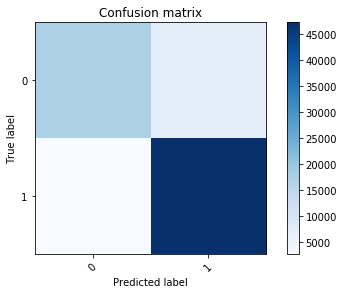

In [24]:
# save best model
checkpointer = ModelCheckpoint(filepath="best_fcnn_weights.hdf5", verbose=0, save_best_only=True)

# train 5 times
for i in range(1):
    print('loop number '+str(i))
    model = Sequential()
    model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(y.shape[1]))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor, checkpointer],verbose=2,epochs=10)


print('Training finished...Loading the best model')  
print()
model.load_weights('best_fcnn_weights.hdf5') # load weights from best model

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true= np.argmax(y_test,axis=1) 
print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, encode_text_index(data, 'C_SEV'))
plt.show()

# CNN After Regularization

In [27]:
# Load modules
batch_size = 128
num_classes = 2
img_rows, img_cols = 1, x_train.shape[1]
x_train_cnn = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print('x_train shape:', x_train_cnn.shape)
print('x_test shape:', x_test_cnn.shape)
print("Training samples: {}".format(x_train_cnn.shape[0]))
print("Test samples: {}".format(x_test_cnn.shape[0]))

x_train shape: (223960, 1, 127, 1)
x_test shape: (74654, 1, 127, 1)
Training samples: 223960
Test samples: 74654


In [30]:
model = Sequential()
input_shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(1, 3), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (1, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 2), strides=None))
model.add(Dropout(0.25)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 125, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 123, 64)        6208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 61, 64)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 61, 64)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3904)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               499840    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

loop number 0
Train on 223960 samples, validate on 74654 samples
Epoch 1/5
223960/223960 - 59s - loss: 0.3478 - acc: 0.8510 - val_loss: 0.3332 - val_acc: 0.8549
Epoch 2/5
223960/223960 - 58s - loss: 0.3320 - acc: 0.8584 - val_loss: 0.3234 - val_acc: 0.8595
Epoch 3/5
223960/223960 - 57s - loss: 0.3285 - acc: 0.8596 - val_loss: 0.3209 - val_acc: 0.8618
Epoch 4/5
223960/223960 - 58s - loss: 0.3267 - acc: 0.8596 - val_loss: 0.3211 - val_acc: 0.8613
Epoch 5/5
223960/223960 - 61s - loss: 0.3254 - acc: 0.8603 - val_loss: 0.3180 - val_acc: 0.8627
Elapsed time: 0:04:54.56
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     24713
           1       0.86      0.95      0.90     49941

    accuracy                           0.86     74654
   macro avg       0.86      0.82      0.84     74654
weighted avg       0.86      0.86      0.86     74654

[[17023  7690]
 [ 2557 47384]]


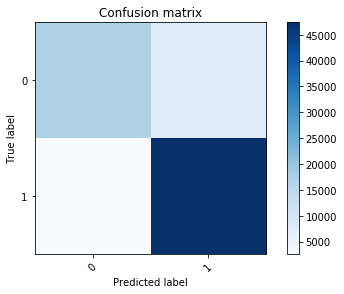

In [31]:
checkpointer = ModelCheckpoint(filepath="l2_best_cnn_weights.hdf5", verbose=0, save_best_only=True)

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])

# train 5 times
for i in range(1):
    print('loop number '+str(i))
    start_time = time.time()

    model.fit(x_train_cnn, y_train,     
              batch_size=batch_size,
              epochs=5,
              verbose=2,
              validation_data=(x_test_cnn, y_test),
              callbacks=[monitor,checkpointer])

    elapsed_time = time.time() - start_time
    print("Elapsed time: {}".format(hms_string(elapsed_time)))

model.load_weights('l2_best_cnn_weights.hdf5')

pred = model.predict(x_test_cnn)
pred = np.argmax(pred,axis=1)
y_true= np.argmax(y_test,axis=1) 
print(classification_report(y_true, pred))

cm = confusion_matrix(y_true, pred)
print(cm)
plt.figure()
plot_confusion_matrix(cm, encode_text_index(data, 'C_SEV'))
plt.show()